### Module 1

##### Task 1

In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
427339,573382,22413,METAL SIGN TAKE IT OR LEAVE IT,6,2011-10-30 14:15:00,2.95,17655.0,United Kingdom
67314,541830ä,ö21718^,$RED METAL BEACH SPADE,1,2011-01-21 17:09:00,2.46,NaN,United Kingdom
146734,549015ä,ö21670^,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-04-05 15:12:00,1.25,15244.0,XxYUnited Kingdom☺️
189558,553158ä,ö22892^,SET OF SALT AND PEPPER TOADSTOOLS,12,2011-05-13 15:24:00,1.25,&14194.0#,United Kingdom
194954,553682,20712,JUMBO BAG WOODLAND ANIMALS,100,2011-05-18 13:20:00,1.79,14646.0,Netherlands
281687,561595,ö20725^,LUNCH BAG RED RETROSPOT,10@,2011-07-28 11:22:00,1.65,12853.0,XxYUnited Kingdom☺️
280149,561378ä,79066K,$RETRO MOD TRAY,12@,2011-07-26 16:55:00,0.85,17861.0,United Kingdom
270991,560603ä,21411,GINGHAM HEART DOORSTOP RED,3,2011-07-20 08:59:00,4.25,18180.0,United Kingdom
45805,540278,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,3,2011-01-06 12:31:00,0.85,15719.0,United Kingdom
394140,570871ä,ö22079^,$RIBBON REEL HEARTS DESIGN,2,2011-10-12 16:36:00,3.29,NaN,XxYUnited Kingdom☺️


In [ ]:
df.duplicated().sum()

91

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1025
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     108000
Country             0
dtype: int64

In [ ]:
df.size

4335272

In [ ]:
import re

def remove_non_standard_characters(column):
    # regex for anything outside a-z, A-Z, 0-9
    pattern = re.compile(r'[^a-zA-Z0-9]')
    cleaned = pattern.sub('', column)
    return cleaned
df['InvoiceNo'] = df['InvoiceNo'].apply(remove_non_standard_characters)
df['StockCode'] = df['StockCode'].apply(remove_non_standard_characters)
df['Quantity'] = df['Quantity'].apply(remove_non_standard_characters)


In [ ]:
def remove_non_numeric_characters(price):
    #regex for non-numeric characters and .
    pattern = re.compile(r'[^0-9.]')
    cleaned = pattern.sub('', price)
    return cleaned

df['UnitPrice'] = df['UnitPrice'].apply(remove_non_numeric_characters)

In [ ]:
#removing 'XxY' & '☺️' from country
substrings_to_remove = ['XxY', '☺️']

for substring in substrings_to_remove:
    df['Country'] = df['Country'].str.replace(substring, '')

In [ ]:
def remove_special_characters(customer_id):
    customer_id = str(customer_id)
    pattern = re.compile(r'[^a-zA-Z0-9]')
    cleaned_id = pattern.sub('', customer_id)
    return cleaned_id
df['CustomerID'] = df['CustomerID'].apply(remove_special_characters)

#replace string nan with NAN type
df['CustomerID'].replace('nan', np.nan, inplace=True)

In [ ]:
#replace $ with emplty str
df['Description'] = df['Description'].str.replace('$', '')

In [ ]:
df.sample(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
535030,581181,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-12-07 15:55:00,2.1,141890,United Kingdom
26925,538524,21934,SKULL SHOULDER BAG,1,2010-12-13 09:35:00,3.36,NaN,United Kingdom
342188,566833,23275,SET OF 3 HANGING OWLS OLLIE BEAK,12,2011-09-15 11:47:00,1.25,178650,United Kingdom
502993,578856,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-11-27 11:18:00,0.95,177690,United Kingdom
444335,574726,22175,PINK OWL SOFT TOY,2,2011-11-06 14:56:00,2.95,146640,United Kingdom
411938,572240,22189,CREAM HEART CARD HOLDER,4,2011-10-21 15:18:00,3.95,137090,United Kingdom
468076,576391,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-11-15 10:13:00,12.46,NaN,United Kingdom
495904,578335,23090,VINTAGE GLASS T-LIGHT HOLDER,12,2011-11-24 09:06:00,0.83,174810,United Kingdom
331195,565994,22309,TEA COSY RED STRIPE,1,2011-09-08 11:46:00,2.55,132440,United Kingdom
120552,546659,22326,ROUND SNACK BOXES SET OF4 WOODLAND,12,2011-03-15 14:25:00,2.95,169960,United Kingdom


In [ ]:
# Convert 'UnitPrice' & Quantity column to float
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)


In [ ]:
#convert InvoiceDate to dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540884 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.sample(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
205966,554854,22077,6 RIBBONS RUSTIC CHARM,12,2011-05-27 09:39:00,1.65,163690,United Kingdom
403383,571563,20775,DAISY NOTEBOOK,6,2011-10-18 10:07:00,1.65,162490,United Kingdom
505926,579103,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,1,2011-11-28 11:39:00,0.29,180410,United Kingdom
426857,573367,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-10-30 13:17:00,2.95,161450,United Kingdom
516748,579946,21481,FAWN BLUE HOT WATER BOTTLE,2,2011-12-01 10:44:00,3.75,159930,United Kingdom
32078,539040,22080,RIBBON REEL POLKADOTS,5,2010-12-15 15:14:00,1.65,172140,United Kingdom
186101,552848,21733,RED HANGING HEART T-LIGHT HOLDER,3,2011-05-11 14:49:00,2.95,143670,United Kingdom
516900,580005,22626,BLACK KITCHEN SCALES,1,2011-12-01 11:38:00,8.50,163760,United Kingdom
174724,551845,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-05-04 14:03:00,1.25,179610,United Kingdom
208274,555108,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2011-05-31 14:18:00,9.95,182310,United Kingdom


##### Task 2

In [3]:
! pip install transformers

In [4]:
!pip install transformers pandas numpy

In [5]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.8 MB/s eta 0:00:00


In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # You can choose other variants as well
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def get_bert_embeddings(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Move inputs to GPU
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Generate BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the embeddings from the output and move them back to CPU
    embeddings = torch.mean(outputs.last_hidden_state, dim=1).squeeze(0).cpu()

    return embeddings.numpy()



In [ ]:
# Generate BERT embeddings for product descriptions
df['Embedding'] = df['Description'].apply(get_bert_embeddings)

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Embedding
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,178500,United Kingdom,"[0.6203091, -0.22092833, -0.21474557, -0.07969..."
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,"[0.29448646, 0.16883154, -0.41429177, -0.14927..."
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,178500,United Kingdom,"[0.060771994, -0.40425855, 0.43998393, 0.14317..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,"[0.29543903, 0.08505664, -0.3291874, 0.0032082..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,"[0.20404683, -0.5174723, 0.087883554, -0.32221..."
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,126800,France,"[0.21986577, -0.097561, 0.05748553, 0.20651019..."
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,126800,France,"[0.1873523, -0.24730237, -0.17628726, -0.03732..."
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,126800,France,"[0.16248566, -0.006867446, 0.050381962, 0.0835..."
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,126800,France,"[0.3474772, 0.054423265, 0.040440775, 0.137209..."


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Specify the path in your Google Drive
file_path = '/content/drive/MyDrive/cleaned_dataset.csv'


In [ ]:
# Save the dataframe to the specified path
df.to_csv(file_path, index=False)


In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  int64  
 7   Country      401604 non-null  object 
 8   Embedding    401604 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 27.6+ MB


In [6]:
# Function to convert space-separated string representation back to numpy array
def convert_to_array(embedding_str):
    embedding_list = embedding_str.strip('[]').split()
    return np.array(embedding_list, dtype=float)

# Use list comprehension for faster processing
embeddings = [convert_to_array(embedding_str) for embedding_str in df['Embedding']]

In [7]:
len(embeddings)

401604

In [8]:
df.shape

(401604, 9)

In [9]:
!pip install pinecone-client[grpc]

In [10]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key="1b558c37-2524-47f9-9576-0a2efc720fe8")
host = 'us-east-1-gcp.pinecone.io'
api_key="1b558c37-2524-47f9-9576-0a2efc720fe8"

In [11]:
!pip install tensorflow

In [12]:
import tensorflow as tf


# Check if GPU is available
if tf.config.experimental.list_physical_devices('GPU'):
    print('GPU is available')
    # Set TensorFlow to use the GPU
    tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
else:
    print('GPU is not available')

index_name = 'products'
index = pc.Index(name=index_name, host=host,api_key=api_key)
# Function to chunk the data into smaller batches
def chunk_data(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Prepare data for upsert
vectors = []
for product_id, embeddings, description in zip(df['StockCode'], embeddings, df['Description']):
    if embeddings is not None and np.count_nonzero(embeddings) > 0:  # Ensure the embedding is not None and has non-zero values
        vectors.append((str(product_id), embeddings.tolist(), {'description': description}))

# Set batch size
batch_size = 50

# Upsert data in batches
for batch in chunk_data(vectors, batch_size):
    index.upsert(vectors=batch)

    # Explicitly call garbage collection
    gc.collect()

# Optional: Check the index status
print(index.describe_index_stats())

print("Pinecone initialization and data insertion complete.")

GPU is available


TypeError: pinecone.data.index.Index() got multiple values for keyword argument 'api_key'

In [ ]:
index_name = 'products'
index = pc.Index(index_name)

# Function to chunk the data into smaller batches
def chunk_data(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Prepare data for upsert
vectors = []
for product_id, embedding, description in zip(df['StockCode'], embeddings, df['Description']):
    if embedding is not None and np.count_nonzero(embedding) > 0:  # Ensure the embedding is not None and has non-zero values
        vectors.append((str(product_id), embedding.tolist(), {'description': description}))

# Set batch size
batch_size = 50

# Upsert data in batches
for batch in chunk_data(vectors, batch_size):
    index.upsert(vectors=batch)

# Optional: Check the index status
print(index.describe_index_stats())

print("Pinecone initialization and data insertion complete.")

In [ ]:
product_ids = df['StockCode'].tolist()


Given the characteristics of product vectors, such as potentially high dimensionality and sparsity, cosine similarity is a suitable choice. It efficiently captures the similarity between vectors while mitigating the effects of varying vector magnitudes.

### Module 2

In [ ]:
!pip install pytesseract

In [ ]:
from PIL import Image
import pytesseract

In [ ]:
# Open an image file
image1 = Image.open('./Screenshot2024-05-06124417.png')
image2 = Image.open('./scc.png')

# Perform OCR using Tesseract
text1 = pytesseract.image_to_string(image1)
text2 = pytesseract.image_to_string(image2)

# Print the extracted text
print(text1)
print(text2)

df.season.unique()

array([1.80427271, @.94319455, @.88845029, @.02737213])

March 2024

SERVING
GOD PAYS
THE'MOST

» F - Mrk. 10:28:30




In [ ]:
cnn_df = pd.read_csv('CNN_Model_Train_Data.csv')
cnn_df['StockCode'] = cnn_df['StockCode'].apply(remove_non_standard_characters)

In [ ]:
cnn_df

,StockCode
0,22384
1,22727
2,22112
3,23298
4,20726
5,21034
6,21931
7,22139
8,22077
9,22423


In [ ]:
!pip install selenium

     ---------------------------------------- 9.5/9.5 MB 551.3 kB/s eta 0:00:00
     ------------------------------------ 467.7/467.7 kB 975.3 kB/s eta 0:00:00
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 58.3/58.3 kB 384.2 kB/s eta 0:00:00
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import time
from urllib.parse import urljoin
from urllib.request import urlretrieve

def get_all_product_page_urls(start_page_url, max_pages=10, delay=7):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    product_links = []
    current_page_url = start_page_url

    for page_num in range(max_pages):
        response = requests.get(current_page_url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to retrieve the page. Status code: {response.status_code}")
            break

        soup = BeautifulSoup(response.content, 'lxml')
        for a in soup.find_all('a', class_='item-img'):
            href = a.get('href')
            if href:
                product_links.append(urljoin(start_page_url, href))

        # Find the link to the next page
        next_page_tag = soup.find('a', class_='list-tool-pagination-next')
        if not next_page_tag or 'href' not in next_page_tag.attrs:
            break
        current_page_url = urljoin(start_page_url, next_page_tag['href'])
        print(f"Moving to next page: {current_page_url}")

        # Wait for a few seconds before moving to the next page
        time.sleep(delay)

    return product_links

def get_product_image_and_title(product_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(product_url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None, None

    soup = BeautifulSoup(response.content, 'lxml')

    img_tag = soup.find('img', class_='product-view-img-original')
    image_url = img_tag.get('src') if img_tag else None

    title_tag = soup.find('h1', class_='product-title')
    title = title_tag.text.strip() if title_tag else None

    return image_url, title

def download_images(image_urls, titles, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for i, (url, title) in enumerate(zip(image_urls, titles)):
        try:
            title_safe = title.replace(' ', '_').replace('/', '_')[:50]  # Make the title filesystem safe
            image_path = os.path.join(save_dir, f'{title_safe}_{i+1}.jpg')
            urlretrieve(url, image_path)
            print(f'Downloaded {url} to {image_path}')
        except Exception as e:
            print(f'Failed to download {url}: {e}')



In [ ]:
# Define the start page URL of the e-commerce listings
start_page_url = 'https://www.newegg.com/p/pl?d=screwdriver'
base_url = 'https://www.newegg.com'

# Scrape product page URLs from multiple pages
product_page_urls = get_all_product_page_urls(start_page_url, max_pages=10, delay=7)

# Scrape image URLs and titles from each product page
image_urls = []
titles = []
for product_url in product_page_urls:
    image_url, title = get_product_image_and_title(product_url)
    if image_url and title:
        image_urls.append(image_url)
        titles.append(title)

# Directory to save downloaded images
save_dir = 'downloaded_images'

# Download images
download_images(image_urls, titles, save_dir)


Downloaded https://c1.neweggimages.com/ProductImage/BDW5S2303060JEEKCE4.jpg to downloaded_images\KUTUMAI_Screwdriver_Bits_Magnetic_Portable_Case_63_1.jpg
Downloaded https://c1.neweggimages.com/ProductImage/B6MWS220105053CEK39.jpg to downloaded_images\WIREHARD_62_in_1_Precision_Screwdriver_Set_Repair__2.jpg
Downloaded https://c1.neweggimages.com/ProductImage/B6MWS220105053CEK39.jpg to downloaded_images\WIREHARD_62_in_1_Precision_Screwdriver_Set_Repair__3.jpg
Downloaded https://c1.neweggimages.com/ProductImage/A4RES2307180CQRER44.jpg to downloaded_images\Screwdriver_Sets_142-Piece_Electronics_Precision_S_4.jpg
Downloaded https://c1.neweggimages.com/ProductImage/BKWBS2310270K681U62.jpg to downloaded_images\Deli_65-in-1_Precision_Screwdriver_Set_Small_Preci_5.jpg
Downloaded https://c1.neweggimages.com/ProductImage/B6MWS22013118Z87528.jpg to downloaded_images\WIREHARD_50_in_1_Precision_Screwdriver_Set_Repair__6.jpg
Downloaded https://c1.neweggimages.com/ProductImage/AGS6S210326YCnXI.jpg to 

First check the url for a product, open the product then download the image along with it's title and go to the next page with a delay of 7 seconds

Each item was downloaded and saved in a directory for the CNN model

In [ ]:
stock_codes = cnn_df['StockCode'].astype(str).tolist()

def load_and_preprocess_images(stock_codes, base_dir, image_size=(128, 128)):
    images = []
    labels = []

    for stock_code in stock_codes:
        product_dir = os.path.join(base_dir, stock_code)
        if os.path.exists(product_dir):
            for image_file in os.listdir(product_dir):
                image_path = os.path.join(product_dir, image_file)
                image = Image.open(image_path).convert('RGB')
                image = image.resize(image_size)
                image = np.array(image) / 255.0  # Normalize to [0, 1]
                images.append(image)
                labels.append(stock_code)
        else:
            print(f"Directory not found for stock code: {stock_code}")

    return np.array(images), np.array(labels)

# Define the base directory for images and load them
base_dir = 'https://drive.google.com/drive/folders/1F4YVmGjnaF63L6JrsYvwAXVaeHd7ej5L?usp=sharing'
images, labels = load_and_preprocess_images(stock_codes, base_dir)

print(f"Loaded {len(images)} images")

Loaded 391 images


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
labels_categorical = to_categorical(labels_encoded)

print(f"Labels shape: {labels_categorical.shape}")


Labels shape: (391, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define input shape and number of classes
input_shape = (128, 128, 3)
num_classes = len(label_encoder.classes_)

# Create the model
model = create_cnn_model(input_shape, num_classes)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
10/10 [==============================] - 12s 144ms/step - loss: 2.3520 - accuracy: 0.1731 - val_loss: 2.1871 - val_accuracy: 0.1899
Epoch 2/10
10/10 [==============================] - 0s 27ms/step - loss: 1.8988 - accuracy: 0.3814 - val_loss: 1.7938 - val_accuracy: 0.3797
Epoch 3/10
10/10 [==============================] - 0s 27ms/step - loss: 1.4133 - accuracy: 0.5321 - val_loss: 1.4160 - val_accuracy: 0.5316
Epoch 4/10
10/10 [==============================] - 0s 23ms/step - loss: 0.9277 - accuracy: 0.7179 - val_loss: 1.2957 - val_accuracy: 0.5316
Epoch 5/10
10/10 [==============================] - 0s 27ms/step - loss: 0.7576 - accuracy: 0.7500 - val_loss: 1.1722 - val_accuracy: 0.6456
Epoch 6/10
10/10 [==============================] - 0s 24ms/step - loss: 0.4988 - accuracy: 0.8429 - val_loss: 0.9369 - val_accuracy: 0.6962
Epoch 7/10
10/10 [==============================] - 0s 24ms/step - loss: 0.4048 - accuracy: 0.8846 - val_loss: 1.0716 - val_accuracy: 0.6962
Epoch 8/10


In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")


3/3 [==============================] - 0s 13ms/step - loss: 1.3221 - accuracy: 0.6835
Validation accuracy: 68.35%


In [ ]:
# Save the model
model.save('product_cnn_model.h5')

# Save the label encoder
import pickle

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
from tensorflow.keras.models import load_model

model = load_model('product_cnn_model.h5')

# Load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)


In [ ]:
def preprocess_image(image_path, image_size=(128, 128)):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(image_size)
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


In [ ]:
def predict_image(model, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)

    # Decode the label
    predicted_label = label_encoder.inverse_transform(predicted_class)

    return predicted_label[0]


In [ ]:
import matplotlib.pyplot as plt

def predict_and_visualize_image(model, label_encoder, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)

    # Decode the label
    predicted_label = label_encoder.inverse_transform(predicted_class)[0]

    # Load and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()



1/1 [==============================] - 0s 19ms/step


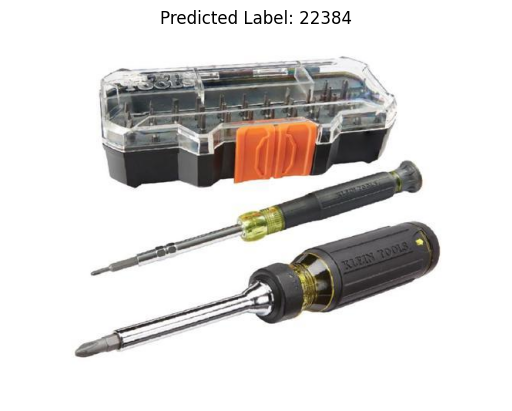

In [ ]:
# Example usage
image_path = '/scre_test.jpg'
predict_and_visualize_image(model, label_encoder, image_path)


1/1 [==============================] - 0s 98ms/step


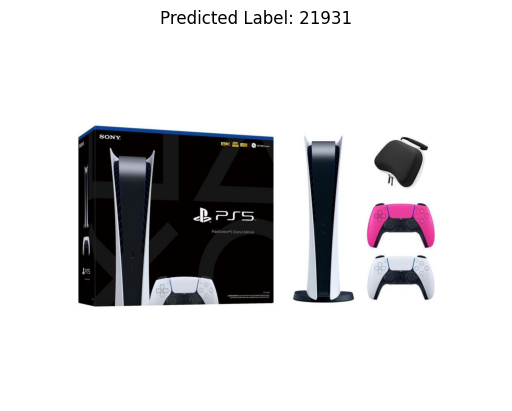

In [ ]:
image_path = '/ps_test.jpg'
predict_and_visualize_image(model, label_encoder, image_path)